In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
from konlpy.tag import Twitter


In [4]:
def WC(x):
    f = open(f'./data/{x}.txt','r', encoding='utf8')
    txt = f.readlines()
    f.close()
    
    twitter = Twitter()
    
    morph_list = []
    for i in txt:
        morphs = twitter.nouns(i)
        for morph in morphs:
            morph_list.append(morph)
            
    for i in morph_list:
        f = open(f'./data/{x}_1.txt','a', encoding='utf8')
        f.write(i+'\n')
        f.close()
        
    f = open(f'./data/{x}_1.txt','r', encoding='utf8')
    txt = f.readlines()
    f.close()
    
    new_txt = []
    for i in txt:
        new_txt.append(i.replace('\n',''))
        
    str_txt = ''
    for i in new_txt:
        str_txt = str_txt + i + ' '
    
    stop = [' ', '.', ',', '-','을','를','와','의','는','에','으로','은','이','과','고',
       '로','입니다','가','까지']
    stopwords = set(stop)
    
    mask = np.array(Image.open('./data/cloud.png'))
    
    wc = WordCloud(background_color = 'white',font_path = 'C:/Users/admin/AppData/Local/Microsoft/Windows/Fonts/NanumGothicBold.ttf',max_words=1000, mask=mask, stopwords=stopwords, margin=10,
               random_state=1, contour_color = 'black').generate(str_txt)

    wc.to_file("a_new_hope.png")
    plt.axis("off")
    plt.figure(figsize = (10,10))
    plt.title("Default colors")
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    return plt.show()

C:\Users\admin\Anaconda3\envs\nlp\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


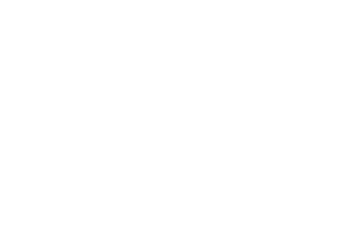

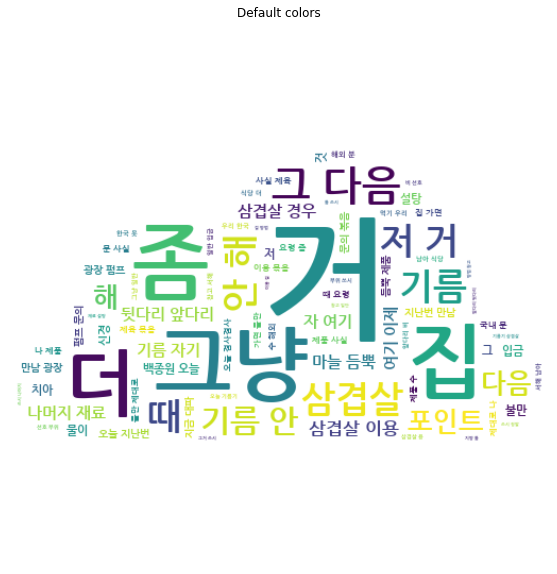

In [5]:
WC('대파제육볶음')